## Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### Input Data

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Yang perlu untuk diperhatikan
1. **Apakah ada data dengan tipe yang kurang sesuai?** Misal: name dengan tipe int64
2. **Apakah ada data yang hilang?** Cari kolom dengan count < jumlah baris

#### Pick Separate Columns
melakukan pemisahan kolom yang ingin dianalisis berdasarkan type datanya.

In [7]:
numericals = ['Survived','Pclass','Age','SibSp','Parch','Fare']
categoricals = ['Sex','Embarked']

#### Sample

In [8]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S


df.sample() , df.head(), df.tail() akan menampilkan beberapa baris data secara langsung.
Perhatikan, **apakah ada kolom dengan nilai yang tidak sesuai dengan nama kolom?**

### Stastical Summary

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Secara default *hanya kolom numerik* saja yang akan ditampilkan
1. **Apakah nilai yang tertera pada setiap kolom masuk akal?**
2. **Apakah nilai maks/min masih berada di batas wajar?**(min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data)
3. **Apakah ada kolom dengan perbedaan yang signifikan antara mean dan median?** Perbedaan antara mean/median mengindikasikan outlier atau skewed distribution

In [8]:
df[categoricals].describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


Yang perlu diperhatikan:
1. **Apakah jumlah unique values masuk akal?**
2. **Apakah frequensi dari nilai yang paling umum terlalu timpang?** 
kalo timpang kolom tsb tidak akan terlalu berguna dalam analisis

#### Value Counting

In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

menampilkan jumlah dari setiap nilai unik di kolom tersebut

#### See Unique Values

In [10]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

menampilkan semua nilai unik di kolom

## Univariate Analysis
Analisis setiap kolom secara terpisah, melihat distribusi nilainya secara detail.

#### Individual Boxplot (Numeric)

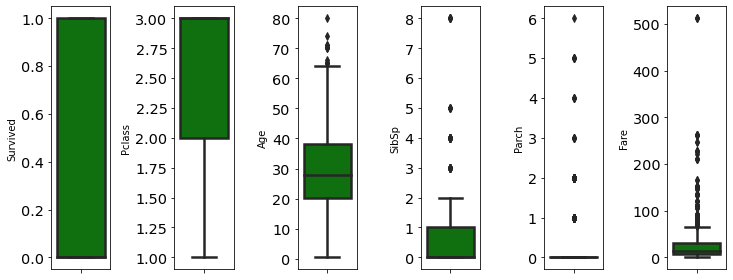

In [17]:
plt.figure(figsize = (12,4))
for i in range(0, len(numericals)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y = df[numericals[i]], color = 'green', orient = 'v')
    plt.tight_layout()

Yang diperhatikan adalah
**Berapa banyak dan berapa jauh outlier di setiap kolom?**
Definisi umum outlier: berjarak 1.5 IQR dari Q1/Q3.
Terlihat untuk variabel **Age, SibSp, Parch, dan Fare memiliki outlier**. Parch dianggap tidak terlalu bermakna sebagai variabel untuk dianalisis.

#### Individual Distplot (Numerical)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

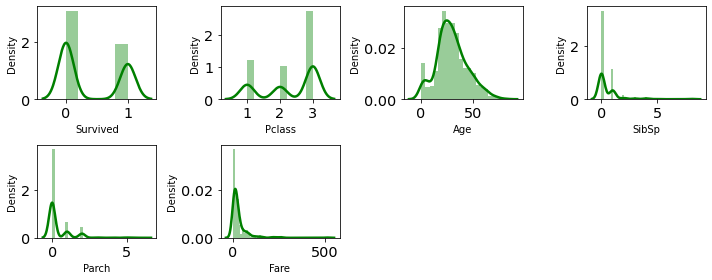

In [18]:
plt.figure(figsize = (10,4))
for i in range (0, len(numericals)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df[numericals[i]], color = 'green')
    plt.tight_layout()
plt.show()

Dalam hal ini kolom **Age** menarik karena datanya cukup granular. Distribusi umur pada kapal titanic dengan puncak umurnya di sekitar 20-30 tahun dan terdapat cukup banyak bayi.

Yang perlu diperhatikan:
1. **Bagaimana bentuk distribusi setiap kolom?**
Apakah normal?Possitive skewed?Negative skewed?Bimodal?
2. **Apakah ada nilai-nilai tertentu yang umum?**
Lonjakan pada distribution plot mungkin memiliki makna tertentu.

#### Individual Countplot (kategorikal)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


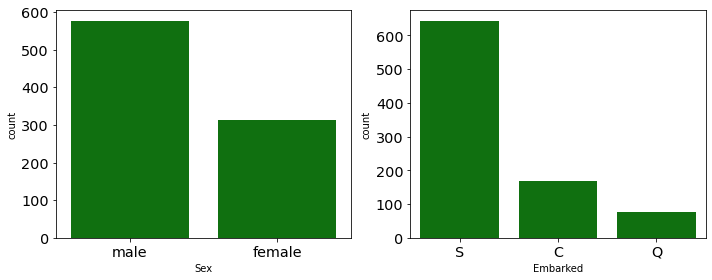

In [27]:
plt.figure(figsize = (10,4))
for i in range (0, len(categoricals)):
    plt.subplot(1, 2, i+1)
    sns.countplot(df[categoricals[i]], color = 'green')
    plt.tight_layout()

Yang perlu diperhatikan adalah **ketimpangan antar kategori, terutama pada target** Sebaran kategori yang timpang pada feature merupakan indikasi ketidakgunaan feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

## Multivariate Analysis
yaitu analisis beberapa kolom sekaligus untuk mencari hubungan antar kolom.

#### Korelasi Linear

Dua variabel X dan Y dikatakan memiliki korelasi linear apabila:
1. **Nilai X dan Y berhubungan sejalan**. Semakin besar X, semakin besar pula Y atau semakin besar X maka semakin kecil Y.
2. **Laju perubahan X terhadap Y KONSTAN**. Perubahan Y ketika X digeser (contohnya) sepanjang 1 satuan dari X = i ke X = i+1 akan sama berapapun i.
**Contoh** : korelasi antara jumlah barang dan harga.

#### Korelasi Non-Linear

Dua variabel X dan Y dikatakan memiliki korelasi non linear apabila:
1. **Nilai X dan Y berhubungan sejalan**. Semakin besar X, semakin besar pula Y atau semakin besar X maka semakin kecil Y.
2. **Laju perubahan X terhadap Y TIDAK KONSTAN**. 
**Contoh** : korelasi antara uang dan kebahagiaan.

#### Correlation Heatmap (Numeric)

<AxesSubplot:>

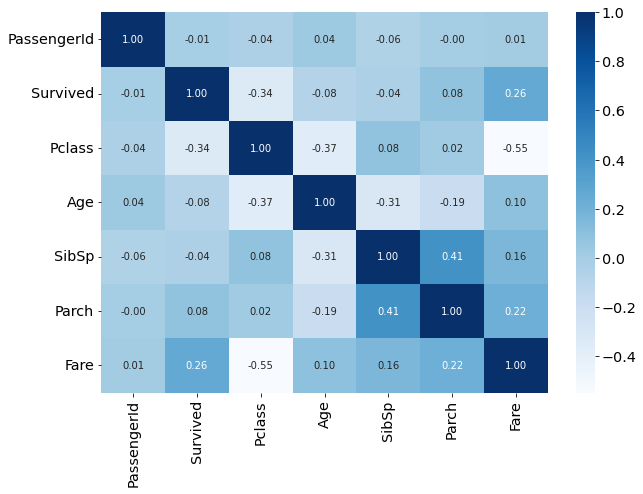

In [28]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f')

Yang perlu diperhatikan:
1. **Apakah feature memiliki korelasi dengan target?** Jika tidak maka model linear tidak dapat digunakan
2. **Apakah ada 2 feature yang berkorelasi kuat (>0.7)?** Bila Ya, ada kemungkinan besar kedua feature tersebut redundan (pilih satu feature saja)